# Project 1
## Sam Edwards

_Should these cells be executed in order, they will answer each of the questions prompted by the Project1.pdf as they go. I tried to make it user friendly as possible, so you could see what my code does and where the numbers in my report came from._

_You may initialize n here, or later._

In [ ]:
n=10;

### The below cell defines every function used for each part of the question. Each function has a comment for its purpose. The substitution algorithms are in here.

In [40]:
import numpy as np
import sympy as sy
import scipy
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline


#Returns the Tridiagonal Matrix special to our problem, with 2's and -1's.
def SpecialMatrix():
    T = np.zeros((n, n))
    for i in range(0,n):
        T[[i],[i]] = 2
        if i < n-1:
            T[[i],[i+1]] = -1
            T[[i+1],[i]] = -1
        else:
            break;
    return T

#Returns a random Tridiagonal matrix, with no zeros on the three diagonals.
#Also generates it in a way that takes care of a fringe case in forward substitution that causes division by zero
def RandomTriMatrix():
    T = np.zeros((n, n))
    for i in range(0,n):
        T[[i],[i]] = int(np.random.uniform(1,9))
        if i < n-1:
            T[[i],[i+1]] = int(np.random.uniform(1,9))
            T[[i+1],[i]] = int(np.random.uniform(1,9))
        else:
            break;
    for i in range(1,n):
        if T[i][i] == (T[i][i-1]*T[i-1][i])/(T[i-1][i-1]):
            T[[i],[i]] = int(np.random.uniform(1,9))
        else:
            T[i][i] = T[i][i]    
    return T


#Returns the vector "b~" as shown in Problem 1a
def h2DiscFncVec():
    f = np.zeros(n)
    for i in range(0,n):
        f[i] += 100*(np.e)**(-10*(i+1)/(n))
    return f

#Returns the discretized form of the function "u" given to us in problem 1a, multiplied by 1/(h^2)
def h2SoluVec():
    u = np.zeros(n)
    for i in range(0,n):
        u[i] += 1-(1-((np.e)**(-10)))*((i+1)/(n))-(np.e)**((-10*(i+1))/(n))
    return u


#Turns a tridiagonal matrix into an upper-triangular matrix through row operations
#also applies these row operations to the discretized function vector "b~"
def TriForwardSub(M, f):
    for i in range(0,n-1):
        f[i+1] += -(M[i+1][i]/M[i][i])*f[i]
        M[i+1] += -((M[i+1][i])/(M[i][i]))*M[i]
    return M, f

#Faster forward substitution for the special matrix on our problem
def SpecialForwardSub(M, f):
    for i in range(0,n-1):
        x = ((i+1)/(i+2))
        f[i+1] += x*f[i]
        M[i+1] += x*M[i]
    return M, f

#Solves for and prints the solution vector "u" that solves Au = b~
def TriBackSub(M, f):
    u = np.zeros(n)
    u[n-1] = f[n-1]/M[n-1][n-1]
    for i in range(n-2,-1,-1):
        u[i] = (f[i]-(M[i][i+1])*u[i+1])/(M[i][i]);
    for i in range(0,n):
        u[i] = u[i]/(n**2)
    return u

#Faster backward substitution for the special matrix on our problem
def SpecialBackSub(M, f):
    u = np.zeros(n)
    u[n-1] = f[n-1]/M[n-1][n-1]
    for i in range(n-2,-1,-1):
        u[i] = (f[i]+u[i+1])/(M[i][i]);
    for i in range(0,n):
        u[i] = u[i]/(n**2)
    return u

# Calls four of the functions above. It initializes the specialized matrix, the discretized function vector,
# and performs the substitutions algorithms on them, returning n values of u at uniform intervals between 0 and 1.
def fnc():
    S = SpecialMatrix()
    f = h2DiscFncVec()
    TriForwardSub(S,f)
    TriBackSub(S,f)
    u = TriBackSub(S,f)
    return u

# Similar to fnc(); simply uses the special algorithms instead.
def SpecialFnc():
    S = SpecialMatrix()
    f = h2DiscFncVec()
    SpecialForwardSub(S,f)
    SpecialBackSub(S,f)
    u = SpecialBackSub(S,f)
    return u

__Below is an example of the general forward and backward substitutions working on a random tridiagonal matrix.__

In [19]:
n=10;
# This cell shows you the random matrix, and f. Feel free to change n.
R = RandomTriMatrix()
f = h2DiscFncVec()
R, f

(array([[ 4.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 5.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  5.,  2.,  6.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  8.,  8.,  3.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  7.,  5.,  4.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  6.,  3.,  6.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  6.,  1.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  2.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  3.,  4.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  1.]]),
 array([  3.67879441e+01,   1.35335283e+01,   4.97870684e+00,
          1.83156389e+00,   6.73794700e-01,   2.47875218e-01,
          9.11881966e-02,   3.35462628e-02,   1.23409804e-02,
          4.53999298e-03]))

In [20]:
# This cell shows you the solution.
TriForwardSub(R,f)
TriBackSub(R,f)
u = TriBackSub(R,f)
u

array([-0.01176544,  0.05927731,  0.01633053, -0.04654342,  0.08667294,
       -0.0252057 , -0.07365697,  0.05645076,  0.01737394, -0.06945036])

__Below is an example of the specialized forward and backward substitutions working on the special tridiagonal matrix.__

In [21]:
n=10;
# This cell shows you the specialized matrix, and f
S = SpecialMatrix()
f = h2DiscFncVec()
S, f

(array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]]),
 array([  3.67879441e+01,   1.35335283e+01,   4.97870684e+00,
          1.83156389e+00,   6.73794700e-01,   2.47875218e-01,
          9.11881966e-02,   3.35462628e-02,   1.23409804e-02,
          4.53999298e-03]))

In [22]:
# This cell shows you the solution.
TriForwardSub(S,f)
TriBackSub(S,f)
u = TriBackSub(S,f)
u

array([ 0.49828051,  0.62868157,  0.62374735,  0.56902606,  0.49598914,
        0.41621426,  0.33396064,  0.25079513,  0.16729416,  0.08366978])

__Executing the next seven cells simply plots the n = 10, 100, & 1000 approximations against the continuous analytical function.__

In [24]:
n=10;
S = SpecialMatrix()
f = h2DiscFncVec()
TriForwardSub(S,f)
TriBackSub(S,f)
u1 = TriBackSub(S,f)

In [25]:
u1Range = np.zeros(n)
for i in range(0,n):
    u1Range[i] = (i+1)/(n)

In [26]:
n=100;
S = SpecialMatrix()
f = h2DiscFncVec()
TriForwardSub(S,f)
TriBackSub(S,f)
u2 = TriBackSub(S,f)

In [27]:
u2Range = np.zeros(n)
for i in range(0,n):
    u2Range[i] = (i)/(n)

In [28]:
n=1000;
S = SpecialMatrix()
f = h2DiscFncVec()
TriForwardSub(S,f)
TriBackSub(S,f)
u3 = TriBackSub(S,f)

In [29]:
u3Range = np.zeros(n)
for i in range(0,n):
    u3Range[i] = (i)/(n)

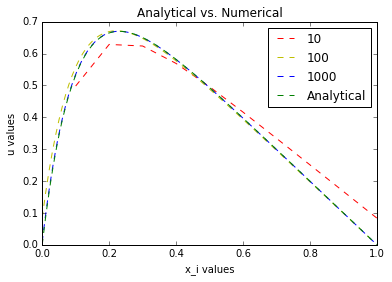

In [30]:
x = np.arange(0, 1, 0.001);
u = 1-(1-((np.e)**(-10)))*(x)-(np.e)**(-10*x)
plt.plot(u1Range, u1, 'r--', label = '10')
plt.plot(u2Range, u2, 'y--', label = '100')
plt.plot(u3Range, u3, 'b--', label = '1000')
plt.plot(x, u, 'g--', label = 'Analytical')
plt.title('Analytical vs. Numerical')
plt.ylabel('u values')
plt.xlabel('x_i values')
plt.legend(loc='best')

__The following two cells are how I averaged the time for the special algorithms. I used a for loop to print out ten times, and then averaged them.__

_Changing n here will show you the different average times._

__Part 1c: Timing__

In [32]:
n=10;
S = SpecialMatrix()
f = h2DiscFncVec()

In [35]:
from timeit import default_timer as timer
sum = 0;
for i in range(0,10):
    start = timer()
    SpecialForwardSub(S,f)
    SpecialBackSub(S,f)
    end = timer()
    print(end - start)
    sum += (end - start)
    
print('Average time is:',sum / 10)

0.00016579893417656422
0.0001155780628323555
0.00010278401896357536
0.0001027979888021946
0.0001229611225426197
0.00010233698412775993
0.00010807299986481667
9.221304208040237e-05
9.322888217866421e-05
9.339791722595692e-05
Average time is: 0.00010991699527949095


__Part 1d: Error__

In [ ]:
#This is where the error function is defined.

def error():
    u = h2SoluVec()
    v = SpecialFnc()
    error = np.log10(np.absolute((v-u)/(u)))
    return error

_The next four cells do the same thing; they give the average error. Each cell is averaging over larger and larger numbers of errors as n increases. This is because n=10 only compares 10 discrete points against their values in the continuous analytical solution, but n=100 is comparing 100 discrete points. Etc._

In [17]:
n=10;

u = h2SoluVec()
v = SpecialFnc()
error = np.log10(np.absolute((v-u)/(u)))
error10 = error
error9 = np.zeros(n-1)
for i in range(0,n-1):
    error9[i] = error10[i]
error9
sum = 0;
for i in range(0,n-1):
    sum += error9[i]
    
average = sum/(n-1)
average

-1.2001175327200952

In [21]:
n=100;

u = h2SoluVec()
v = SpecialFnc()
error = np.log10(np.absolute((v-u)/(u)))
error100 = error
error99 = np.zeros(n-1)
for i in range(0,n-1):
    error99[i] = error100[i]
#np.amax(np.absolute(error99))
sum = 0;
for i in range(0,n-1):
    sum += error99[i]
    
average = sum/(n-1)
average


-2.0197669699141811

In [22]:
n=1000;

u = h2SoluVec()
v = SpecialFnc()
error = np.log10(np.absolute((v-u)/(u)))
error1000 = error
error999 = np.zeros(n-1)
for i in range(0,n-1):
    error999[i] = error1000[i]
#np.amax(np.absolute(error999))
sum = 0;
for i in range(0,n-1):
    sum += error999[i]
    
average = sum/(n-1)
average

-2.9285680794882682

In [23]:
n=10000;

u = h2SoluVec()
v = SpecialFnc()
error = np.log10(np.absolute((v-u)/(u)))
error10000 = error
error9999 = np.zeros(n-1)
for i in range(0,n-1):
    error9999[i] = error10000[i]
#np.amax(np.absolute(error9999))

sum = 0;
for i in range(0,n-1):
    sum += error9999[i]
    
average = sum/(n-1)
average

-3.9207672723033653

__LU Decomposition__

_Here, the LU Decomposition can be timed for different n values by changing n in the first cell and executing them in sequence. It works just like the previous timing cells above._

_Be careful about going above n=1000_

In [37]:
n=10;

In [38]:
S = SpecialMatrix()
y = h2DiscFncVec()/100

In [39]:
from timeit import default_timer as timer
sum = 0;
for i in range(0,10):
    start = timer()
    L_S = scipy.linalg.lu(S)[1]
    U_S = scipy.linalg.lu(S)[2]
    z = linalg.solve(L_S,y)
    end = timer()
    print(end - start)
    sum += (end - start)
    
print("Average time:", sum / 10)



0.0010698139667510986
0.00032869097776710987
0.0002753098960965872
0.00026271003298461437
0.0002756889443844557
0.0002553500235080719
0.00025881710462272167
0.000251248013228178
0.0002678080927580595
0.0002511588390916586
Average time: 0.00034965958911925554
